# Diagramas de barras para tablas de contingencia
<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>
<br>
En esta lección se mostrará como dibujar diagramas de barras a partir de tablas de contingencia.

A continuación las librerías necesarias para realizar los ejemplos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Leyendo los datos del ejemplo

Para el ejemplo vamos a usar la base de datos sobre apartamentos usados en la ciudad de Medellín, la base de datos está disponible en [este enlace](https://raw.githubusercontent.com/fhernanb/datos/master/aptos2015). Para leer la base de datos usamos las siguientes instrucciones.

In [2]:
url = 'https://raw.githubusercontent.com/fhernanb/datos/master/aptos2015'
dt = pd.read_table(url, comment='#', sep=' ')
dt.head()

,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si


## Diagramas de barras para tablas de contingencia de una vía

Para crear este tipo de tablas se usa la función `crosstab`, la documentación completa de esta función se puede encontrar en este [enlace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html). Luego para dibujar la tabla de contingencia se usa la función `plot.bar`, la documentación completa de esta función se puede encontrar [aquí](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html).

A continuación se crea una tabla de frecuencia absoluta para la variable `ubicacion`.

In [3]:
t1 = pd.crosstab(index=dt['ubicacion'], columns="Numero")
t1

col_0,Numero
ubicacion,
aburra sur,169
belen guayabal,67
centro,38
laureles,73
norte,10
occidente,69
poblado,268


Usando la tabla `t1` se dibuja el diagrama de barras usando las siguientes instrucciones.

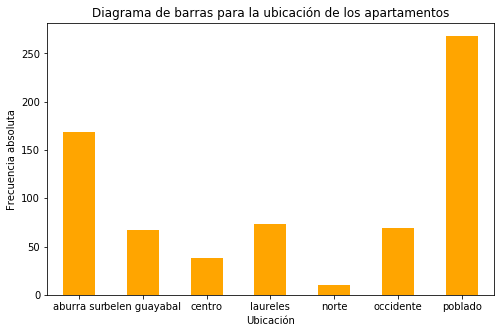

In [4]:
t1.plot.bar(rot=0, figsize=[8, 5], legend=False, color='orange')
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia absoluta')
plt.title('Diagrama de barras para la ubicación de los apartamentos');

## Diagramas de barras para tablas de contingencia de dos vías

Al igual que en el ejemplo anterior, primero se construye la tabla de contingencia y luego con ella se dibuja el diagrama de barras.

A continuación se crea una tabla de frecuencia absoluta para las variable `ubicacion` y `parqueadero`.

In [5]:
c1 = pd.crosstab(index=dt["ubicacion"], columns=dt["parqueadero"])
c1

parqueadero,no,si
ubicacion,,
aburra sur,39,130
belen guayabal,31,36
centro,28,10
laureles,3,70
norte,3,7
occidente,20,49
poblado,2,266


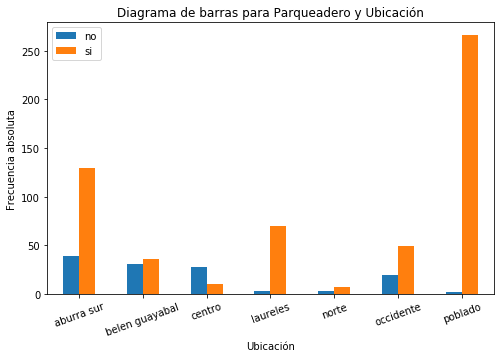

In [19]:
c1.plot.bar(rot=20, figsize=[8, 5])
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia absoluta')
plt.title('Diagrama de barras para Parqueadero y Ubicación')
plt.legend(loc=0);

Para incluir los totales se hace así:

In [7]:
c2 = pd.crosstab(index=dt["ubicacion"], columns=dt["parqueadero"], margins=True)
c2

parqueadero,no,si,All
ubicacion,,,
aburra sur,39,130,169
belen guayabal,31,36,67
centro,28,10,38
laureles,3,70,73
norte,3,7,10
occidente,20,49,69
poblado,2,266,268
All,126,568,694


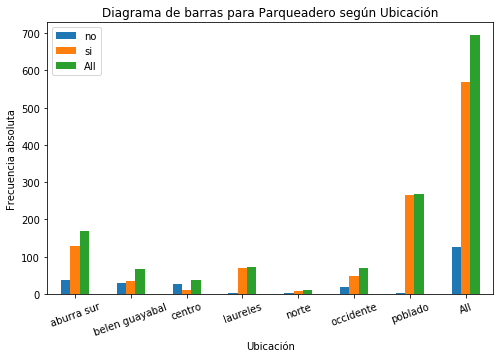

In [8]:
c2.plot.bar(rot=20, figsize=[8, 5])
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia absoluta')
plt.title('Diagrama de barras para Parqueadero según Ubicación')
plt.legend(loc=0);

El parámetro `normalize` se puede usar para obtener tablas de frecuencia relativa global, por columnas, por filas. Abajo los ejemplos de como usar `normalize`.

In [9]:
c3 = pd.crosstab(index=dt["ubicacion"], columns=dt["parqueadero"], margins=True, normalize='all')
round(c3 * 100, 1)

parqueadero,no,si,All
ubicacion,,,
aburra sur,5.6,18.7,24.4
belen guayabal,4.5,5.2,9.7
centro,4.0,1.4,5.5
laureles,0.4,10.1,10.5
norte,0.4,1.0,1.4
occidente,2.9,7.1,9.9
poblado,0.3,38.3,38.6
All,18.2,81.8,100.0


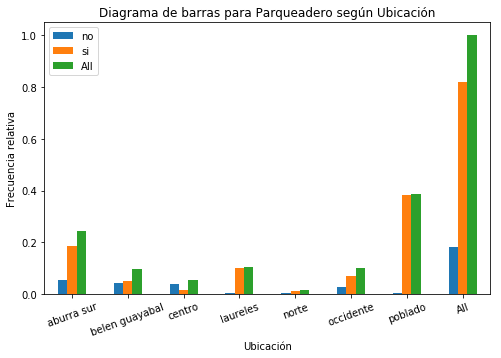

In [10]:
c3.plot.bar(rot=20, figsize=[8, 5])
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia relativa')
plt.title('Diagrama de barras para Parqueadero según Ubicación')
plt.legend(loc=0);

In [11]:
c4 = pd.crosstab(index=dt["ubicacion"], columns=dt["parqueadero"], margins=True, normalize='columns')
round(c4 * 100, 1)

parqueadero,no,si,All
ubicacion,,,
aburra sur,31.0,22.9,24.4
belen guayabal,24.6,6.3,9.7
centro,22.2,1.8,5.5
laureles,2.4,12.3,10.5
norte,2.4,1.2,1.4
occidente,15.9,8.6,9.9
poblado,1.6,46.8,38.6


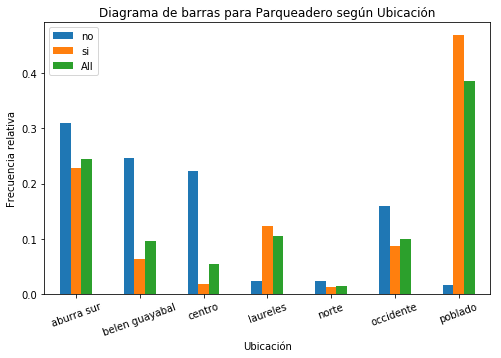

In [12]:
c4.plot.bar(rot=20, figsize=[8, 5])
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia relativa')
plt.title('Diagrama de barras para Parqueadero según Ubicación')
plt.legend(loc=0);

In [13]:
c5 = pd.crosstab(index=dt["ubicacion"], columns=dt["parqueadero"], margins=True, normalize='index')
round(c5 * 100, 1)

parqueadero,no,si
ubicacion,,
aburra sur,23.1,76.9
belen guayabal,46.3,53.7
centro,73.7,26.3
laureles,4.1,95.9
norte,30.0,70.0
occidente,29.0,71.0
poblado,0.7,99.3
All,18.2,81.8


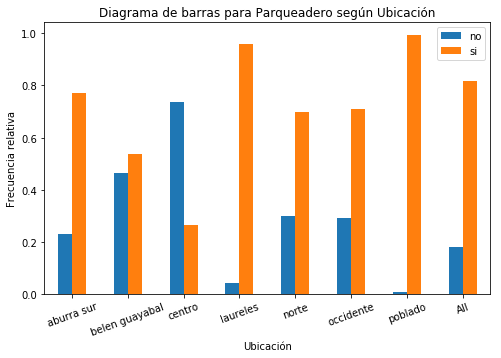

In [14]:
c5.plot.bar(rot=20, figsize=[8, 5])
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia relativa')
plt.title('Diagrama de barras para Parqueadero según Ubicación')
plt.legend(loc=0);

## Tablas de contingencia con 3 o más variables

Es posible usar la función `crosstab` para crear este tipo de tablas usando la siguiente estructura:
`pd.crosstab([variables por fila], [variables por columna])`.

A continuación se muestra un ejemplo de una tabla de contingencia que tiene en la fila la variable `parqueadero` mientras que en la columna las variables `ubicación` y `balcón`.

In [15]:
c6 = pd.crosstab(dt["parqueadero"], [dt["ubicacion"], dt["balcon"]])
c6

ubicacion   aburra sur      belen guayabal     centro     laureles     norte  \
balcon              no   si             no  si     no  si       no  si    no   
parqueadero                                                                    
no                  20   19              5  26     13  15        0   3     1   
si                  18  112              7  29      5   5       25  45     1   

ubicacion      occidente     poblado       
balcon      si        no  si      no   si  
parqueadero                                
no           2        10  10       2    0  
si           6        18  31      60  206

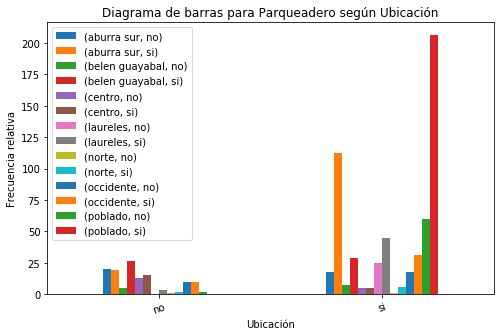

In [16]:
c6.plot.bar(rot=20, figsize=[8, 5])
plt.xlabel('¿Tiene parqueadero el apartamento')
plt.ylabel('Frecuencia relativa')
plt.title('Diagrama de barras para Parqueadero, Ubicación y Balcón')
plt.legend(loc=0);

A continuación se muestra un ejemplo de una tabla de contingencia que tiene en la fila las variables `parqueadero` y `balcón` mientras que en la columna la variable `ubicación`.

In [17]:
c7 = pd.crosstab([dt["parqueadero"], dt['balcon']], dt["ubicacion"])
c7

ubicacion           aburra sur  belen guayabal  centro  laureles  norte  \
parqueadero balcon                                                        
no          no              20               5      13         0      1   
            si              19              26      15         3      2   
si          no              18               7       5        25      1   
            si             112              29       5        45      6   

ubicacion           occidente  poblado  
parqueadero balcon                      
no          no             10        2  
            si             10        0  
si          no             18       60  
            si             31      206

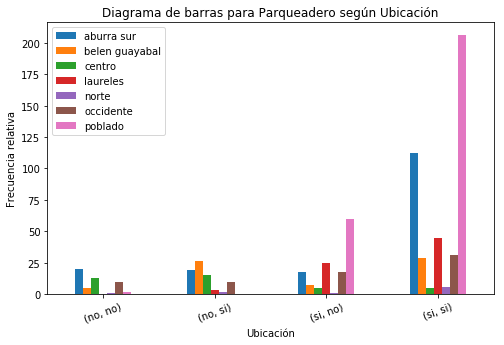

In [18]:
c7.plot.bar(rot=20, figsize=[8, 5])
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia relativa')
plt.title('Diagrama de barras para Parqueadero según Ubicación')
plt.legend(loc=0);